In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.datasets import make_blobs

In [2]:
def initialize_centers(X, n_clusters):
    centers = []

    # Randomly choose the first centroid
    center_id = np.random.choice(X.shape[0])
    centers.append(X[center_id])

    # Choose the next centroids using KMeans++ initialization
    for _ in range(1, n_clusters):
        dist_sq = np.array([min([np.inner(c - x, c - x) for c in centers]) for x in X])
        probs = dist_sq / dist_sq.sum()
        cumulative_probs = probs.cumsum()
        r = np.random.rand()

        for j, p in enumerate(cumulative_probs):
            if r < p:
                i = j
                break

        centers.append(X[i])

    return np.array(centers)

In [3]:
def kmeans_minus(X, n_clusters, n_init=10, max_iter=300):
    best_inertia = np.inf
    best_centers = None

    for _ in range(n_init):
        # Select the initial centroids with KMeans++ initialization
        centers = initialize_centers(X, n_clusters)

        for _ in range(max_iter):
            # Assign labels based on the closest center
            labels, _ = pairwise_distances_argmin_min(X, centers)

            # Update the centers
            new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])

            # Check for convergence
            if np.all(centers == new_centers):
                break

            centers = new_centers

        # Compute inertia
        inertia = np.sum((X - centers[labels]) ** 2)

        # Update the best centers
        if inertia < best_inertia:
            best_inertia = inertia
            best_centers = centers

    return best_centers, labels, best_inertia

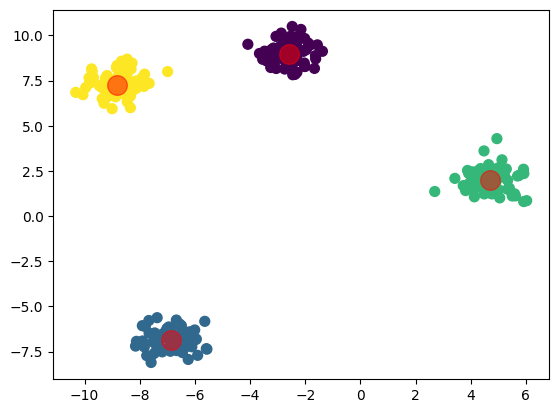

In [5]:
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Aplicar o KMeans--
centers, labels, inertia = kmeans_minus(X, 4)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap="viridis")
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=200, alpha=0.5)
plt.show()